#####  Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


##### Reading the data from csv files and storing the data in dataframes

In [2]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

##### Analysing matches dataframe

In [3]:
matches.shape

(636, 18)

In [4]:
matches.sample(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
625,626,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN


1. Each match has a corresponding unique id. So any match can be recognised uniquely by the match id.
2. All features except 'win by run' & 'win by wickets' seems to be categorical in nature. So majority of fetaures are categorica.
3. 636 rows indicates that a total of 636 matches were played in 10 seasons.

In [5]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [6]:
matches['season'].value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: season, dtype: int64

1. In 2011, we see a jump in the no of matches. This is primarily because 2 new teams(Pune warriors & Kochi tuskers) were introduced.
2. In 2014, we see a decline in the no of matches because no of teams reduced back to 8.

In [7]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [8]:
matches['city'].unique().size

31

In [9]:
matches.city.value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [10]:
matches.city.value_counts().sum()

629

In [11]:
matches[matches.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [12]:
matches.city.nunique()

30

In [13]:
city = matches.city.value_counts().reset_index()
city.columns=['city', 'no_of_matches']
city['%_of_total_matches'] = ((city['no_of_matches'])/(matches.city.value_counts().sum())*100)
city['cumulative_percentage'] = (city['%_of_total_matches'].cumsum())
city

,city,no_of_matches,%_of_total_matches,cumulative_percentage
0,Mumbai,85,13.513514,13.513514
1,Bangalore,66,10.492846,24.006359
2,Kolkata,61,9.697933,33.704293
3,Delhi,60,9.538951,43.243243
4,Hyderabad,49,7.790143,51.033386
5,Chennai,48,7.631161,58.664547
6,Chandigarh,46,7.313196,65.977742
7,Jaipur,33,5.246423,71.224165
8,Pune,32,5.087440,76.311606
9,Durban,15,2.384738,78.696343


1. All matches across 10 seasons has been played in 30 different cities including foreign lands.
2. Most matches has been played in 'MUMBAI', followed by Bangalore & Kolkata.
3. Matches in foreign country has been played in -Durban, Centurion, Johannesburg, Cape Town, Abu Dhabi, Port Elizabeth, Port Elizabeth, Kimberley, East London & Bloemfontein.
4. There is no data for city column for 7 matches played in season-2014
5. Around 80% of the matches has been just played in just 10 cities viz;'Mumbai', 'Bangalore', 'Kolkata', 'Delhi', 'Hyderabad', 'Chennai','Chandigarh', 'Jaipur', 'Pune' & 'Durban'

##### Analysing the month in which IPL matches are played

In [14]:
matches[['date']].value_counts()

date      
2011-04-29    2
2011-05-07    2
2015-04-11    2
2011-04-15    2
2011-04-16    2
             ..
2012-04-23    1
2012-04-20    1
2012-04-18    1
2012-04-16    1
2017-05-21    1
Length: 450, dtype: int64

Date column has 'object datatype'. We will convert this date column in datetime format so that its easier for our analysis

In [15]:
matches['date'] = pd.to_datetime(matches['date'])

In [16]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

Creating 2 new cloumns for year & month for the match played

In [17]:
matches['year'] = matches['date'].dt.year # This will extract the year from date column
matches['month'] = matches['date'].dt.month # This will extract the month from date column
matches.sample(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month
172,173,2009,Johannesburg,2009-05-23,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,MK Pandey,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,2009,5


In [18]:
matches['month'].value_counts()

5    308
4    297
3     29
6      2
Name: month, dtype: int64

In [19]:
# Mapping the Month no to Month names
matches['month'] = matches['month'].map({ 1:'January',
                                          2:'February',
                                          3:'March',
                                          4:'April',
                                          5:'May',
                                          6:'June',
                                          7:'July',
                                          8:'August',
                                          9:'September',
                                          10:'October',
                                          11:'November',
                                          12:'December'})

In [20]:
matches.sample(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN,2015,April
111,112,2008,Kolkata,2008-05-25,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul,Eden Gardens,SJ Davis,I Shivram,NaN,2008,May


In [21]:
matches['month'].value_counts()

May      308
April    297
March     29
June       2
Name: month, dtype: int64

We see that the IPL gets all the matches played in only 3 months mostly

In [22]:
match_count = matches.groupby(['year','month']).size().reset_index(name='match_count')
match_count.sort_values(by=['year','month'],ascending=True)

,year,month,match_count
0,2008,April,17
1,2008,June,1
2,2008,May,40
3,2009,April,20
4,2009,May,37
5,2010,April,31
6,2010,March,29
7,2011,April,36
8,2011,May,37
9,2012,April,39


In [24]:
pivot_table = match_count.pivot_table(index='year', columns='month', values='match_count')
pivot_table

month,April,June,March,May
year,,,,
2008,17.0,1.0,NaN,40.0
2009,20.0,NaN,NaN,37.0
2010,31.0,NaN,29.0,NaN
2011,36.0,NaN,NaN,37.0
2012,39.0,NaN,NaN,35.0
2013,42.0,NaN,NaN,34.0
2014,20.0,1.0,NaN,39.0
2015,29.0,NaN,NaN,30.0
2016,27.0,NaN,NaN,33.0


In [25]:
pivot_table.fillna(0.0,inplace = True) # Filling the NaN values with 0

In [26]:
pivot_table

month,April,June,March,May
year,,,,
2008,17.0,1.0,0.0,40.0
2009,20.0,0.0,0.0,37.0
2010,31.0,0.0,29.0,0.0
2011,36.0,0.0,0.0,37.0
2012,39.0,0.0,0.0,35.0
2013,42.0,0.0,0.0,34.0
2014,20.0,1.0,0.0,39.0
2015,29.0,0.0,0.0,30.0
2016,27.0,0.0,0.0,33.0


In [27]:
pivot_table = pivot_table[['March','April','May','June']] # Ordering the columns in the dataframe

In [28]:
pivot_table

month,March,April,May,June
year,,,,
2008,0.0,17.0,40.0,1.0
2009,0.0,20.0,37.0,0.0
2010,29.0,31.0,0.0,0.0
2011,0.0,36.0,37.0,0.0
2012,0.0,39.0,35.0,0.0
2013,0.0,42.0,34.0,0.0
2014,0.0,20.0,39.0,1.0
2015,0.0,29.0,30.0,0.0
2016,0.0,27.0,33.0,0.0


In [29]:
pivot_table['Total_matches'] = pivot_table.sum(axis=1)
pivot_table

C:\Users\lenovo\AppData\Local\Temp/ipykernel_27712/926428604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table['Total_matches'] = pivot_table.sum(axis=1)


month,March,April,May,June,Total_matches
year,,,,,
2008,0.0,17.0,40.0,1.0,58.0
2009,0.0,20.0,37.0,0.0,57.0
2010,29.0,31.0,0.0,0.0,60.0
2011,0.0,36.0,37.0,0.0,73.0
2012,0.0,39.0,35.0,0.0,74.0
2013,0.0,42.0,34.0,0.0,76.0
2014,0.0,20.0,39.0,1.0,60.0
2015,0.0,29.0,30.0,0.0,59.0
2016,0.0,27.0,33.0,0.0,60.0


In [30]:
pivot_table.Total_matches.sum()

636.0

Mostly the matches are played in the month of April & May. Only in 2010 50% of the matches were held in March. Otherwise the favourable months for IPL matches to be played are April & May only.

##### Analysing the teams

In [31]:
matches.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)

In [32]:
team1 = matches['team1'].value_counts()
team1

Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Rising Pune Supergiants        15
Gujarat Lions                  14
Kochi Tuskers Kerala            7
Name: team1, dtype: int64

In [33]:
team2 = matches['team2'].value_counts()
team2

Delhi Daredevils               84
Royal Challengers Bangalore    82
Kolkata Knight Riders          80
Mumbai Indians                 75
Kings XI Punjab                71
Rajasthan Royals               64
Chennai Super Kings            54
Deccan Chargers                32
Sunrisers Hyderabad            30
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiants        15
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

In [34]:
team_matches = team1 + team2

In [35]:
team_matches.sort_values(ascending=False)

Mumbai Indians                 157
Royal Challengers Bangalore    152
Kings XI Punjab                148
Kolkata Knight Riders          148
Delhi Daredevils               147
Chennai Super Kings            131
Rajasthan Royals               118
Sunrisers Hyderabad             76
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiants         30
Kochi Tuskers Kerala            14
dtype: int64

In [344]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,April
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,April
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017,April
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017,April
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN,2016,May
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN,2016,May
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN,2016,May
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN,2016,May


In [36]:
teams_matches = team_matches.sort_values(ascending=False).reset_index()
teams_matches.columns=['Teams','No_of_matches_Played']
teams_matches

,Teams,No_of_matches_Played
0,Mumbai Indians,157
1,Royal Challengers Bangalore,152
2,Kings XI Punjab,148
3,Kolkata Knight Riders,148
4,Delhi Daredevils,147
5,Chennai Super Kings,131
6,Rajasthan Royals,118
7,Sunrisers Hyderabad,76
8,Deccan Chargers,75
9,Pune Warriors,46


In [37]:
team_matches.nunique()

11

1. Most no of matches has been played by Mumbai.
2. Minimum matches has been played by Kochi tuskers as they were only for 1 season
3. There are a total of 11 unique teams which have played IPL till 2017

In [38]:
matches['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

1. Mumbai has won the most no of tosses, folllowed by kolkata. We can say that Mumbai are lucky enough to win the tosses.These are absolute no. Lets see in what percentage of matches have they won the tosses

In [39]:
tosses = matches['toss_winner'].value_counts().reset_index()
tosses.columns=['Team', 'No_of_toss_wins']
# tosses['Total_matches_Played']  = team_matches.sort_values(ascending=False)
# tosses.drop('Total_matches_Played',axis=1)
new_tosses = tosses.merge(teams_matches, left_on='Team', right_on='Teams')
new_tosses.drop('Teams',axis=1,inplace=True)
new_tosses
new_tosses['Toss_win_percentage'] = (new_tosses['No_of_toss_wins']/new_tosses['No_of_matches_Played'])*100


In [40]:
new_tosses.sort_values(by='Toss_win_percentage',ascending=False)

,Team,No_of_toss_wins,No_of_matches_Played,Toss_win_percentage
7,Deccan Chargers,43,75,57.333333
12,Kochi Tuskers Kerala,8,14,57.142857
0,Mumbai Indians,85,157,54.140127
6,Rajasthan Royals,63,118,53.389831
1,Kolkata Knight Riders,78,148,52.702703
5,Chennai Super Kings,66,131,50.381679
10,Gujarat Lions,15,30,50.000000
2,Delhi Daredevils,72,147,48.979592
3,Royal Challengers Bangalore,70,152,46.052632
8,Sunrisers Hyderabad,35,76,46.052632


From toss win percentage , we see that Deccan chargers has the highest toss win percentage

In [41]:
matches['toss_decision'].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

We see that most of the teams opted for fielding first after winning the toss.

In [42]:
matches_won = matches['winner'].value_counts().reset_index()
matches_won.columns = ['Team','No_of_wins']
matches_won = matches_won.merge(teams_matches, left_on ='Team',right_on='Teams')
matches_won.drop('Teams',axis=1,inplace=True)
matches_won['Match_win_%'] = (matches_won['No_of_wins']/matches_won['No_of_matches_Played'])*100
matches_won.sort_values(by='Match_win_%',ascending=False)

,Team,No_of_wins,No_of_matches_Played,Match_win_%
1,Chennai Super Kings,79,131,60.305344
0,Mumbai Indians,92,157,58.598726
7,Sunrisers Hyderabad,42,76,55.263158
5,Rajasthan Royals,63,118,53.389831
2,Kolkata Knight Riders,77,148,52.027027
9,Rising Pune Supergiants,15,30,50.000000
3,Royal Challengers Bangalore,73,152,48.026316
4,Kings XI Punjab,70,148,47.297297
10,Gujarat Lions,13,30,43.333333
12,Kochi Tuskers Kerala,6,14,42.857143


1. Chennai Super Kings have the highest win percentage whereas Pune warriors have the Lowest win percentage.    

In [43]:
matches['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [44]:
tied_matches = matches[matches['result']=='tie']
tied_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN,2017,April
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN,2009,April
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN,2010,March
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN,2013,April
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN,2013,April
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN,2014,April
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN,2015,April


In [45]:
tied_matches_team_count1 = tied_matches['team1'].value_counts().reset_index()
tied_matches_team_count1.columns=['Team','No_of_tied_matches']
tied_matches_team_count1

,Team,No_of_tied_matches
0,Rajasthan Royals,3
1,Gujarat Lions,1
2,Kings XI Punjab,1
3,Royal Challengers Bangalore,1
4,Delhi Daredevils,1


In [46]:
tied_matches_team_count2 = tied_matches['team2'].value_counts().reset_index()
tied_matches_team_count2.columns = ['Team','No_of_tied_matches']
tied_matches_team_count2

,Team,No_of_tied_matches
0,Kolkata Knight Riders,2
1,Mumbai Indians,1
2,Chennai Super Kings,1
3,Sunrisers Hyderabad,1
4,Royal Challengers Bangalore,1
5,Kings XI Punjab,1


In [47]:
tied_matches_team_count = tied_matches_team_count1.merge(tied_matches_team_count2,how='outer',on='Team',indicator=True)

In [48]:
tied_matches_team_count.set_index('Team',inplace=True)

In [49]:
tied_matches_team_count.drop('_merge', axis=1, inplace=True)

In [50]:
tied_matches_team_count['No_of_tied_matches']=tied_matches_team_count.sum(axis=1)

In [51]:
tied_matches_team_count.sort_values(by='No_of_tied_matches',ascending=False)

,No_of_tied_matches_x,No_of_tied_matches_y,No_of_tied_matches
Team,,,
Rajasthan Royals,3.0,NaN,3.0
Kings XI Punjab,1.0,1.0,2.0
Royal Challengers Bangalore,1.0,1.0,2.0
Kolkata Knight Riders,NaN,2.0,2.0
Gujarat Lions,1.0,NaN,1.0
Delhi Daredevils,1.0,NaN,1.0
Mumbai Indians,NaN,1.0,1.0
Chennai Super Kings,NaN,1.0,1.0
Sunrisers Hyderabad,NaN,1.0,1.0


1. Rajasthan Royals has been involved in most no of ties 
2. Punjab, Bangalore & KKR have been involved in 2 ties each

In [52]:
tied = tied_matches_team_count.index.to_list()

In [53]:
allteams =teams_matches['Teams'].values.tolist()

In [54]:
list(set(allteams).difference(tied))

['Kochi Tuskers Kerala',
 'Deccan Chargers',
 'Rising Pune Supergiants',
 'Pune Warriors']

1. We see that above 4 teams have never been involved in any tie matches.

In [84]:
matches.sample(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month
350,351,2012,Pune,2012-05-03,Mumbai Indians,Pune Warriors,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,SL Malinga,Subrata Roy Sahara Stadium,Asad Rauf,S Asnani,NaN,2012,May
102,103,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN,2008,May


In [74]:
no_result_matches_1 = matches[matches['result'] =='no result']
no_result_matches_1 = no_result_matches_1['team1'].value_counts().reset_index()
no_result_matches_1.columns = ['teams','no_result_count']
no_result_matches_1

,teams,no_result_count
0,Delhi Daredevils,2
1,Royal Challengers Bangalore,1


In [76]:
no_result_matches_2 = matches[matches['result'] =='no result']
no_result_matches_2 = no_result_matches_2['team2'].value_counts().reset_index()
no_result_matches_2.columns = ['teams','no_result_count']
no_result_matches_2

,teams,no_result_count
0,Pune Warriors,1
1,Rajasthan Royals,1
2,Royal Challengers Bangalore,1


In [82]:
no_result_matches = no_result_matches_1.merge(no_result_matches_2, how='outer', on='teams')
no_result_matches.set_index('teams',inplace=True)
no_result_matches['no_result_count'] = no_result_matches.sum(axis=1)
no_result_matches.drop(columns=['no_result_count_x','no_result_count_y'], axis=1, inplace =True)
no_result_matches

,no_result_count
teams,
Delhi Daredevils,2.0
Royal Challengers Bangalore,2.0
Pune Warriors,1.0
Rajasthan Royals,1.0


1. Delhi Daredevils & RCB have been involved in maximum no of no result games

##### Analysing win_by_runs

In [93]:
matches['win_by_runs'].max()

146

So the maximum win by runs is 146 . Lets see between which teams this match was played

In [97]:
matches[matches['win_by_runs'] == matches.win_by_runs.max()][['season','team1','team2','winner']]

,season,team1,team2,winner
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians


So we see that Mumbai indians have won by the highest margin of runs.

In [123]:
win_by_min_runs = matches[matches['win_by_runs'] == matches[matches['win_by_runs']!=0]['win_by_runs'].min()][['season','team1','team2','winner']]
win_by_min_runs['winner'].value_counts()

Mumbai Indians                 2
Kings XI Punjab                2
Delhi Daredevils               1
Chennai Super Kings            1
Gujarat Lions                  1
Royal Challengers Bangalore    1
Name: winner, dtype: int64

1. Mumbai Indians & Kings XI Punjab have won most no of matches by the minimum margin of runs(1 run)

##### Analysing win_by_wickets

In [131]:
win_by_max_wickets = matches[matches['win_by_wickets'] == matches['win_by_wickets'].max()][['season','team1','team2','winner']]
win_by_max_wickets

,season,team1,team2,winner
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
34,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab
71,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
542,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


In [133]:
win_by_max_wickets['winner'].value_counts()

Royal Challengers Bangalore    2
Kolkata Knight Riders          1
Kings XI Punjab                1
Deccan Chargers                1
Delhi Daredevils               1
Rajasthan Royals               1
Mumbai Indians                 1
Chennai Super Kings            1
Sunrisers Hyderabad            1
Name: winner, dtype: int64

1. Bangalore has won 2 times by 10 wickets

##### Analysing palyer of the Match

In [145]:
player_of_match = matches['player_of_match'].value_counts().reset_index()
player_of_match.columns = ['Player','No_of_Matches']
player_of_match_more_than_10_times = player_of_match[player_of_match['No_of_Matches']>=10]
player_of_match_more_than_10_times


,Player,No_of_Matches
0,CH Gayle,18
1,YK Pathan,16
2,DA Warner,15
3,AB de Villiers,15
4,RG Sharma,14
5,SK Raina,14
6,MS Dhoni,13
7,G Gambhir,13
8,AM Rahane,12
9,MEK Hussey,12


1. There are 15 different players who have won 'Player of the match' 10 or more times .
2. Chris Gayle has won most no of Player of match awards.

<IPython.core.display.Javascript object>


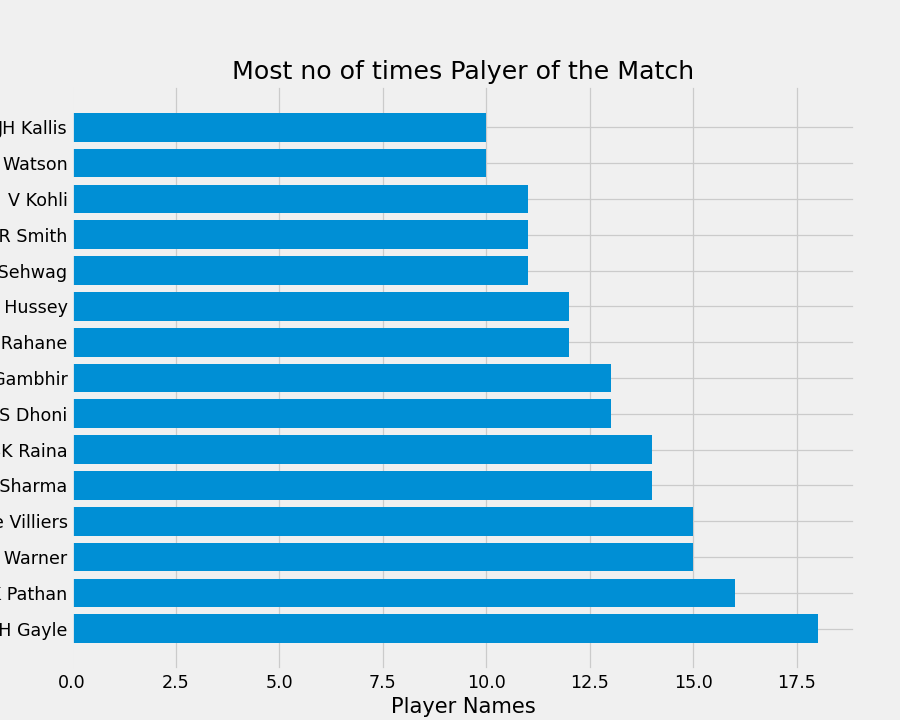

Text(0, 0.5, 'No of times Won POM')

In [192]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.barh(player_of_match_more_than_10_times['Player'],player_of_match_more_than_10_times['No_of_Matches'] )
plt.title('Most no of times Palyer of the Match')
plt.xlabel('Player Names')
plt.ylabel('No of times Won POM')


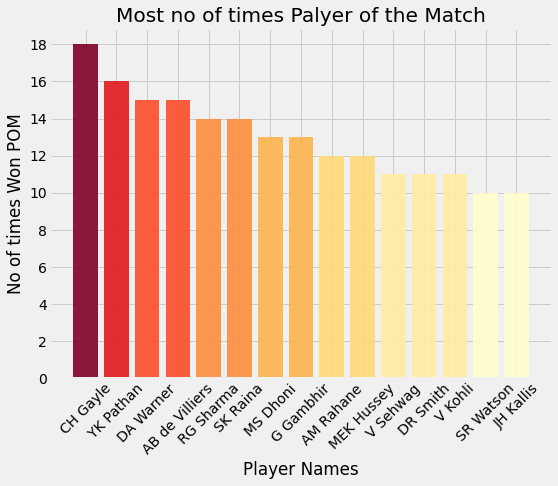

In [305]:
plt.figure(figsize=(8,6))

# Calculate the color values based on frequency
min_value = min(player_of_match_more_than_10_times['No_of_Matches'])
max_value = max(player_of_match_more_than_10_times['No_of_Matches'])
norm = plt.Normalize(min_value, max_value)
colors = plt.cm.YlOrRd(norm(player_of_match_more_than_10_times['No_of_Matches']), alpha=0.9)


plt.style.use('fivethirtyeight')
bar_plot = plt.bar(player_of_match_more_than_10_times['Player'],player_of_match_more_than_10_times['No_of_Matches'], color=colors)
plt.title('Most no of times Palyer of the Match')
plt.xlabel('Player Names')
plt.ylabel('No of times Won POM')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,20,2))
plt.tick_params(axis='y', labelcolor='black')

plt.show()

In [199]:
matches['venue'].nunique()

35

In [200]:
matches['venue'].value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

1. Highest no of matches have been played in M Chinnaswamy Stadium followed by Eden Gardens & Eden Gardens

In [205]:
umpire1 = matches['umpire1'].unique()
umpire1

array(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
       nan, 'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan'],
      dtype=object)

In [206]:
umpire2 = matches['umpire2'].unique()
umpire2

array(['NJ Llong', 'S Ravi', 'CK Nandan', 'C Shamshuddin', nan,
       'AK Chaudhary', 'Nitin Menon', 'A Deshmukh', 'VK Sharma',
       'M Erasmus', 'CB Gaffaney', 'A Nand Kishore', 'RE Koertzen',
       'SL Shastri', 'GA Pratapkumar', 'DJ Harper', 'K Hariharan',
       'RB Tiffin', 'AM Saheba', 'MR Benson', 'IL Howell',
       'AV Jayaprakash', 'I Shivram', 'BR Doctrove', 'BG Jerling',
       'SJ Davis', 'SD Ranade', 'SJA Taufel', 'TH Wijewardene',
       'SK Tarapore', 'HDPK Dharmasena', 'SS Hazare', 'PR Reiffel',
       'AL Hill', 'RJ Tucker', 'VA Kulkarni', 'JD Cloete', 'BNJ Oxenford',
       'S Asnani', 'S Das', 'K Srinath', 'Subroto Das', 'RK Illingworth',
       'PG Pathak', 'K Srinivasan', 'SD Fry'], dtype=object)

In [223]:
umpires = list(set(umpire1).union(umpire2))
len(umpires)

55

A total of 54 different umpires were involved in 10 seasons of IPL

In [233]:
matches[matches['umpire3'] == matches['umpire3'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month


'umpire3' column has no values in it.

#### Analysing Deliveries dataset

In [241]:
pd.set_option('display.max_columns', 21)

In [242]:
delivery.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
140978,596,2,Kolkata Knight Riders,Rising Pune Supergiants,5,5,SA Yadav,Shakib Al Hasan,NLTC Perera,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
98402,415,2,Kolkata Knight Riders,Kings XI Punjab,13,4,MS Bisla,EJG Morgan,Harmeet Singh,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


1. Delivery is  a dataframe having details of ball -by- ball happening in all the matches. 
2. It gives details of batsman on strike on a particular delivery.
3. Non-striker at the other end for that ball
4. Bowler name
5. Whether its 1st innings or 2nd innings
6. Extras given in terms of 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_run', 'penalty_runs', 'extra_runs'.
7. It gives details of runs scored by the batsman on that particular delivery
8. Details related to whether the player is dismissed of the ball or not.
9. Kind of dimissal & the fielder involved in dismissal of batsman.
10. Each row in this dataframe has details for each ball. So , in other words we can say that the total no of rows in the dataframe is nothing but the total no of balls bowled in all the 636 matches across 10 seasons

In [245]:
no_of_ball_bowled = delivery.shape[0]
no_of_ball_bowled

150460

So a total of 150460 balls were bowlded 

Let's  calculate the no of sixes hit by all teams and maximum sixes hit by any player.

In [248]:
delivery[delivery['batsman_runs'] == 6].shape[0]

6523

So a total of 6523 sixes were hit by all teams combined across 10 seasons.

In [276]:
sixes = delivery[delivery['batsman_runs'] == 6]
sixes_by_teams = sixes.groupby(by='batting_team').size().sort_values(ascending=False).reset_index()
sixes_by_teams.columns = ['teams','No_of_sixes']
sixes_by_teams = sixes_by_teams.set_index('teams')
sixes_by_teams

,No_of_sixes
teams,
Royal Challengers Bangalore,935
Mumbai Indians,876
Kings XI Punjab,762
Chennai Super Kings,742
Delhi Daredevils,686
Kolkata Knight Riders,659
Rajasthan Royals,538
Deccan Chargers,400
Sunrisers Hyderabad,364


In [278]:
total_matches_delivery = delivery.groupby(['match_id','batting_team']).size().reset_index()['batting_team'].value_counts().reset_index()
total_matches_delivery.columns = ['teams','total_matches']
total_matches_delivery = total_matches_delivery.set_index('teams')
total_matches_delivery

,total_matches
teams,
Mumbai Indians,157
Royal Challengers Bangalore,152
Kolkata Knight Riders,148
Kings XI Punjab,148
Delhi Daredevils,147
Chennai Super Kings,131
Rajasthan Royals,117
Sunrisers Hyderabad,76
Deccan Chargers,75


In [ ]:
sixes_by_teams['Total_matches_played'] = total_matches_delivery['total_matches']

In [279]:
sixes_by_teams = sixes_by_teams.merge(total_matches_delivery[['total_matches']], left_index=True, right_index=True, how='left')

In [283]:
sixes_by_teams['avg_sixes_per_match'] = sixes_by_teams['No_of_sixes']/sixes_by_teams['total_matches']
sixes_by_teams.sort_values('avg_sixes_per_match', ascending= False)

,No_of_sixes,total_matches,avg_sixes_per_match
teams,,,
Royal Challengers Bangalore,935,152,6.151316
Chennai Super Kings,742,131,5.664122
Mumbai Indians,876,157,5.579618
Rising Pune Supergiant,89,16,5.562500
Deccan Chargers,400,75,5.333333
Gujarat Lions,155,30,5.166667
Kings XI Punjab,762,148,5.148649
Rising Pune Supergiants,68,14,4.857143
Sunrisers Hyderabad,364,76,4.789474


1. RCB has the highest no_of sixes hit as well as highest avg_sixes_per_match

#### lets analyse the sixes hit by each player

In [285]:
delivery.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98422,415,2,Kolkata Knight Riders,Kings XI Punjab,16,6,EJG Morgan,MS Bisla,P Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
68944,292,1,Deccan Chargers,Mumbai Indians,12,3,DT Christian,B Chipli,KA Pollard,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [295]:
sixes_by_player = sixes.groupby('batsman').size().sort_values(ascending=False).reset_index()
sixes_by_player.columns = ['Player','No_Of_Sixes']
sixes_by_player = sixes_by_player[sixes_by_player['No_Of_Sixes'] >=100]
sixes_by_player

,Player,No_Of_Sixes
0,CH Gayle,266
1,SK Raina,174
2,RG Sharma,173
3,V Kohli,160
4,DA Warner,160
5,AB de Villiers,158
6,MS Dhoni,156
7,YK Pathan,149
8,KA Pollard,148
9,Yuvraj Singh,141


1. A Total of 301 players have hit sixes in IPL over 10 seasons totalling to 6523 sixes.
2. Maximum no of sixes is hit by Chris gayle
3. 15 Players have hit more than 100 sixes in IPL History.

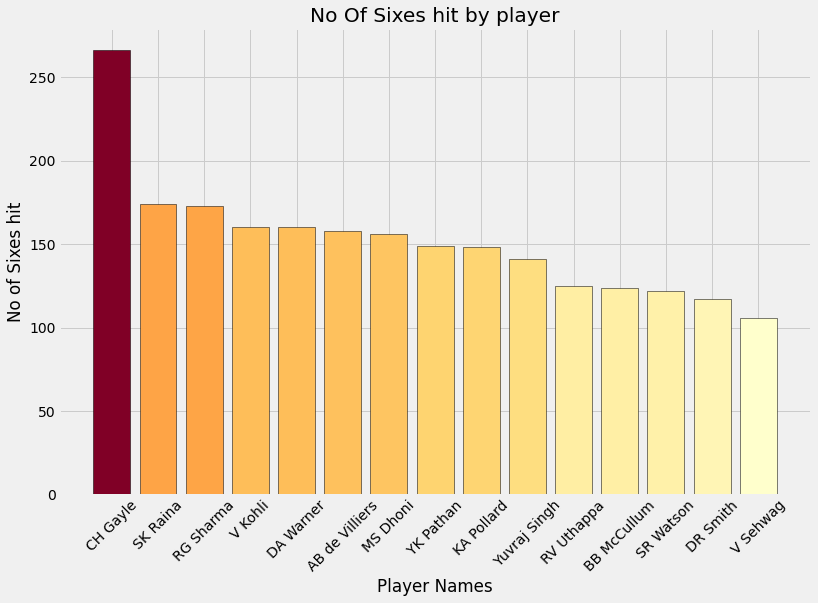

In [322]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))

# Calculate the color values based on frequency
min_value = min(sixes_by_player['No_Of_Sixes'])
max_value = max(sixes_by_player['No_Of_Sixes'])
norm = plt.Normalize(min_value, max_value)
# colors = plt.cm.YlOrRd(norm(sixes_by_player['No_Of_Sixes']), alpha=0.9)
colors=plt.cm.YlOrRd(norm(sixes_by_player['No_Of_Sixes']))


plt.bar(sixes_by_player['Player'],sixes_by_player['No_Of_Sixes'], edgecolor ='black', color=colors)

plt.title('No Of Sixes hit by player')
plt.xlabel('Player Names')
plt.ylabel('No of Sixes hit')
plt.xticks(rotation=45)
# plt.yticks(np.arange(0,20,2))
plt.tick_params(axis='y', labelcolor='black')


##### Now lets analyse the no of sixes hit by each teams in the death overs

Death overs--over 16-20

In [352]:
death_overs = sixes[sixes['over'] >15 ]
death_overs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
105,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,1,DJ Hooda,Yuvraj Singh,A Choudhary,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
115,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,3,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
124,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,BCJ Cutting,DJ Hooda,SR Watson,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
221,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,16,2,STR Binny,SR Watson,BCJ Cutting,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150331,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
150332,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
150335,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN


In [327]:
sixes[sixes['over'] >15].shape

(2421, 21)

One observation hers is that there are a total of 2421 rows for sixes in overs 16-20 and total sixes hit was 6523, so 2421/6523= 0.37 so 37% of the sixes were hit in the death overs .

In [345]:
sixes_in_death_over = sixes[sixes['over'] >15]
sixes_in_death_over = sixes_in_death_over.groupby(by='batting_team').size().reset_index()
sixes_in_death_over.columns = ['Team','No_of_sixes_in_death_overs']
sixes_in_death_over = sixes_in_death_over.sort_values(by='No_of_sixes_in_death_overs',ascending=False).set_index('Team')
sixes_in_death_over = sixes_in_death_over.merge(total_matches_delivery[['total_matches']], left_index=True, right_index=True, how='left')
sixes_in_death_over['Avg_No_of_sixes_in_death_overs'] = sixes_in_death_over['No_of_sixes_in_death_overs']/sixes_in_death_over['total_matches']
sixes_in_death_over.sort_values('Avg_No_of_sixes_in_death_overs',ascending=False)

,No_of_sixes_in_death_overs,total_matches,Avg_No_of_sixes_in_death_overs
Team,,,
Mumbai Indians,373,157,2.375796
Royal Challengers Bangalore,359,152,2.361842
Rising Pune Supergiants,32,14,2.285714
Rising Pune Supergiant,34,16,2.125000
Chennai Super Kings,277,131,2.114504
Sunrisers Hyderabad,147,76,1.934211
Deccan Chargers,138,75,1.840000
Kings XI Punjab,268,148,1.810811
Pune Warriors,78,45,1.733333


1. Mumbai indians have hit the most no of sixes in death overs. Also, the average no of sixes hit by Mumbai indians is the most 

##### Lets see which batsman ha shit the most no of sixes in death overs

In [366]:
death_overs_sixes_by_player = death_overs.groupby('batsman').size().sort_values(ascending=False).reset_index()
death_overs_sixes_by_player.columns = ['Player','No_of_Sixes_in_death_overs']
death_overs_sixes_by_player = death_overs_sixes_by_player.head(10)
death_overs_sixes_by_player

,Player,No_of_Sixes_in_death_overs
0,MS Dhoni,114
1,KA Pollard,92
2,AB de Villiers,86
3,RG Sharma,81
4,Yuvraj Singh,66
5,V Kohli,62
6,DA Miller,50
7,JP Duminy,47
8,YK Pathan,45
9,JA Morkel,39


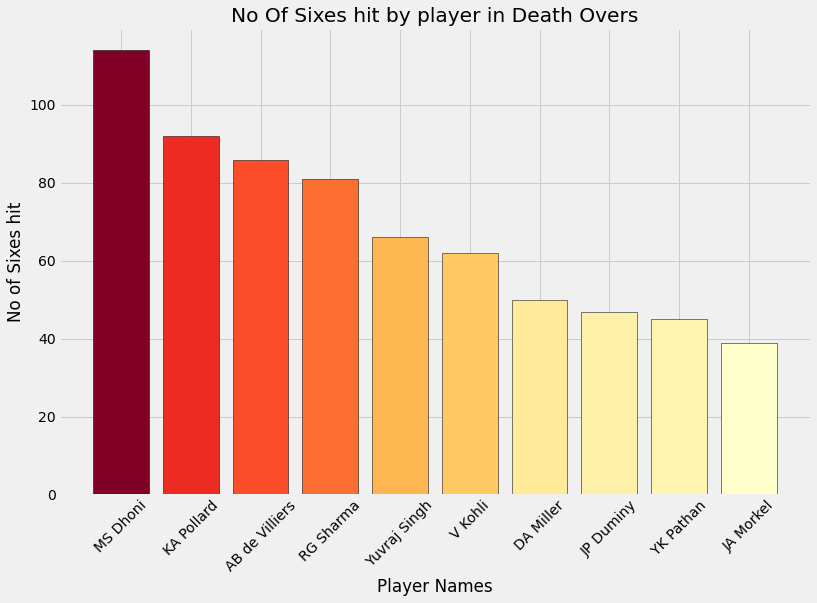

In [367]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))

# Calculate the color values based on frequency
min_value = min(death_overs_sixes_by_player['No_of_Sixes_in_death_overs'])
max_value = max(death_overs_sixes_by_player['No_of_Sixes_in_death_overs'])
norm = plt.Normalize(min_value, max_value)
# colors = plt.cm.YlOrRd(norm(sixes_by_player['No_Of_Sixes']), alpha=0.9)
colors=plt.cm.YlOrRd(norm(death_overs_sixes_by_player['No_of_Sixes_in_death_overs']))


plt.bar(death_overs_sixes_by_player['Player'],death_overs_sixes_by_player['No_of_Sixes_in_death_overs'], edgecolor ='black', color=colors)

plt.title('No Of Sixes hit by player in Death Overs')
plt.xlabel('Player Names')
plt.ylabel('No of Sixes hit')
plt.xticks(rotation=45)
# plt.yticks(np.arange(0,20,2))
plt.tick_params(axis='y', labelcolor='black')
